# 4. Bootstrap

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
from scipy.stats import kstest
import matplotlib.pyplot as plt 

### 1. Непарамерический bootstrap

Загрузим данные извержения гейзера

In [2]:
df = pd.read_excel('geyser.xlsx')

Вычисляем среднее арифметическое

In [3]:
mean = df.duration.mean()
print(mean)

209.2683823529412


$n=1000$ раз сгенерируем подвыборки из данных извержения гейзера, вычислим среднее значение в каждой подвыборке. С параметром replace=True можно осуществлять выборку с возвращением.

In [8]:
n = 1000;
bootstrap_mean = []
for _ in range(n):
    bootstrap_df = df.sample(len(df), replace=True)
    bootstrap_mean.append(bootstrap_df.duration.mean() - mean)

Построим гистограмму для $n=1000$ данных ${\overline X}_n - \mu$.

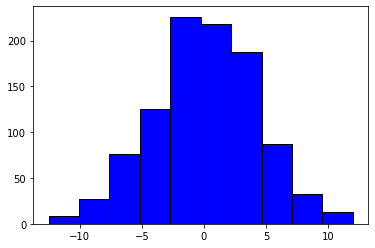

In [9]:
plt.hist(bootstrap_mean, color = 'blue', edgecolor = 'black');
plt.savefig('bootstrap_mean_geyser', dpi = 200, transparent=True, bbox_inches = 'tight')

Найдём долю ${\overline X}_n$ отличающихся от $\mu$ на 5

In [10]:
print(len([item for item in bootstrap_mean if abs(item) > 5]))

218


### 2. Парамерический bootstrap

Загрузим данные о времени между сбоями программного обеспечения

In [11]:
df = pd.read_excel('inter_failure_times.xlsx')

Вычисляем среднее арифметическое

In [12]:
mean = df.time.mean()
print(mean)

656.8814814814815


$n=1000$ раз сгенерируем выборки из распределения Пуассона с параметрами $\lambda = {{1}\over{{\overline x}_n}}$ и len(df).

In [15]:
n = 1000;
bootstrap_t_ks = []
for _ in range(n):
    bootstrap_df = poisson.rvs(mu = 1/mean, size = len(df))
    stat, p_value = kstest(df.time, bootstrap_df)
    bootstrap_t_ks.append(stat)

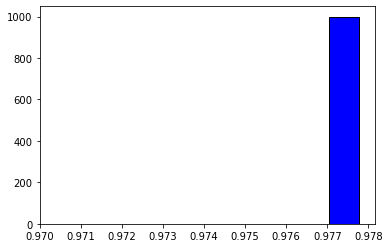

In [16]:
plt.hist(bootstrap_t_ks, color = 'blue', edgecolor = 'black');
plt.savefig('bootstrap_t_ks', dpi = 200, transparent=True, bbox_inches = 'tight')